In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
single_image= X_train[0]

In [8]:
single_image.shape

(28, 28)

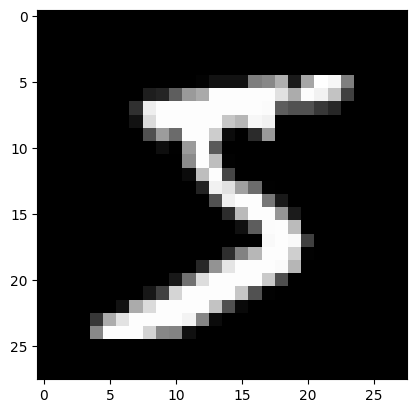

In [9]:
plt.imshow(single_image,cmap='gray')

In [10]:
y_train.shape

(60000,)

In [11]:
X_train.min()

0

In [12]:
X_train.max()

255

In [13]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [14]:
X_train_scaled.min()

0.0

In [15]:
X_train_scaled.max()

1.0

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

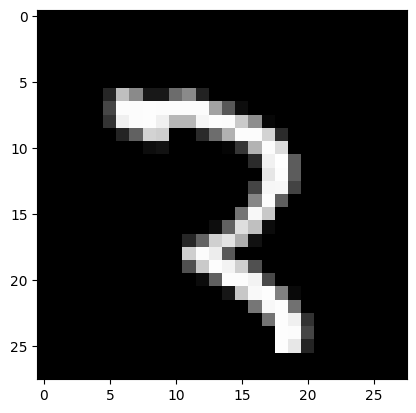

In [20]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5),  activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [26]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 51s 53ms/step - loss: 0.2165 - accuracy: 0.9365 - val_loss: 0.0569 - val_accuracy: 0.9810
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 5/5
938/938 [==============================] - 31s 34ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0397 - val_accuracy: 0.9874


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.216538,0.936517,0.056874,0.9810
1,0.064022,0.980100,0.042492,0.9861
2,0.046504,0.985367,0.038126,0.9879
3,0.036678,0.988383,0.031038,0.9899
4,0.030147,0.990417,0.039690,0.9874


Developed by :KANISHKAR M 
Reg No:212222240044


<Axes: >

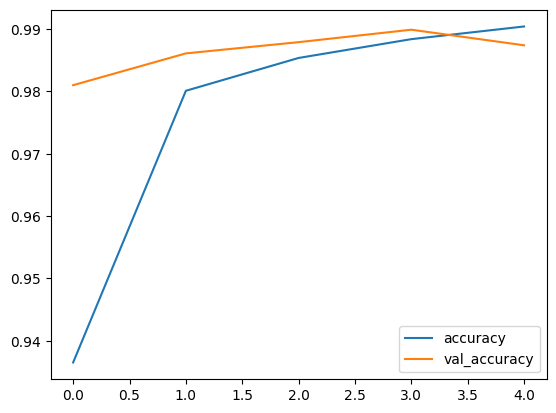

In [35]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
metrics[['accuracy','val_accuracy']].plot()

Developed by :KANISHKAR M 
Reg No:212222240044


<Axes: >

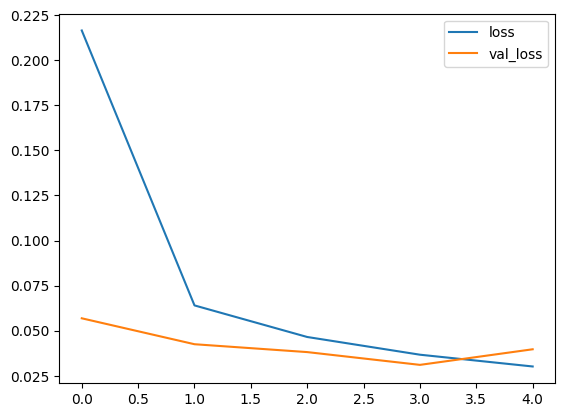

In [36]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
metrics[['loss','val_loss']].plot()

In [37]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 5ms/step


In [38]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
print(confusion_matrix(y_test,x_test_predictions))

Developed by :KANISHKAR M 
Reg No:212222240044
[[ 966    1    0    0    3    2    2    1    3    2]
 [   0 1130    0    0    1    1    0    1    2    0]
 [   0    2 1022    3    0    0    0    1    4    0]
 [   0    0    0  998    0   10    0    0    1    1]
 [   0    0    0    0  969    0    0    0    2   11]
 [   0    0    0    2    0  890    0    0    0    0]
 [   1    2    0    0    5   14  936    0    0    0]
 [   0    3    4    2    0    2    0 1015    1    1]
 [   1    0    1    2    0   10    0    0  957    3]
 [   0    2    0    0    2    8    0    1    5  991]]


In [39]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
print(classification_report(y_test,x_test_predictions))

Developed by :KANISHKAR M 
Reg No:212222240044
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.95      1.00      0.97       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [51]:
img = image.load_img('/content/mnist2.png')

In [52]:
type(img)

PIL.Image.Image

In [61]:
img = image.load_img('/content/mnist2.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [62]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 76ms/step


In [63]:
print(x_single_prediction)

[3]


Developed by :KANISHKAR M 
Reg No:212222240044


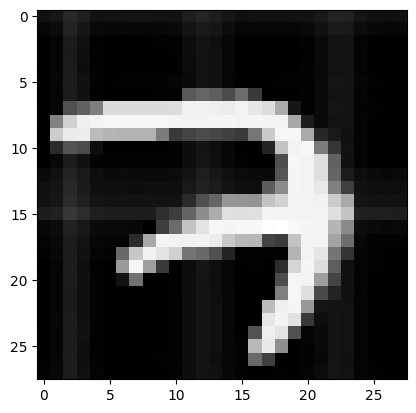

In [60]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')